<a href="https://colab.research.google.com/github/JUNGEUNAH/HG_MLDL/blob/main/01_%EB%A7%88%EC%BC%93%EA%B3%BC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생선 분류 문제

### 도미 데이터 준비하기

In [3]:
# 생선의 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

# 생선의무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

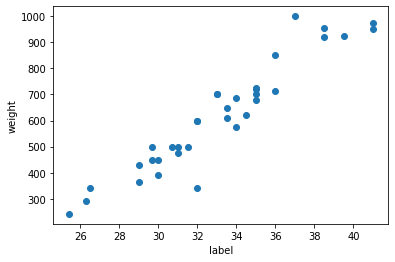

In [4]:
import matplotlib.pyplot as plt   # matplotlib의 pyplot함수를 plt로 줄여서 사용

plt.scatter(bream_length, bream_weight)
plt.xlabel('label')   # x축의 이름을 화면에 표시 _ x축은 길이
plt.ylabel('weight')  # y축의 이름을 화면에 표시 _ y축은 무게
plt.show()    # 준비된 그래프를 화면에 출력

### 빙어 데이터 준비하기

In [5]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

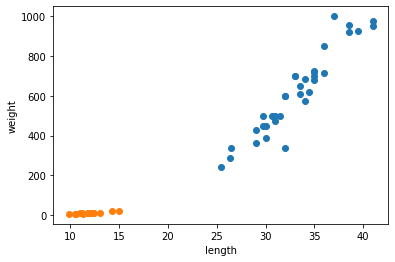

In [6]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 첫번째 머신러닝 프로그램: k-Nearest neighbors

In [7]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [8]:
fish_data = [[l,w] for l, w in zip(length,weight)]    # zip() - 나열된 리스트 각각에서 하나씩 원소를 꺼내 반환
                                                      # for문은 zip() 함수로 length와 weight 리스트에서 원소를 하나씩 꺼내어 l과 w에 할당
                                                      # [l,w]가 하나의 원소로 구성된 리스트가 만들어 짐
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [9]:
fish_target = [1]*35 + [0]*14   # 앞서 도미와 빙어를 순서대로 나열했기 때문에 
                                # 정답 리스트는 1이 35번 등장하고나서 0이 14번 등장하면 됨.
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
from sklearn.neighbors import KNeighborsClassifier

'''
패키지나 모듈 전체를 임포트하지 않고 특정 클래스만 임포트하려면, from ~ import 구문을 사용
import sklearn 
model = sklearn.neighbors.KNeighborsClassifier()	# 이런식으로 클래스 이름을 길게 사용하지 않아도 됨
'''

'\n패키지나 모듈 전체를 임포트하지 않고 특정 클래스만 임포트하려면, from ~ import 구문을 사용\nimport sklearn \nmodel = sklearn.neighbors.KNeighborsClassifier()\t# 이런식으로 클래스 이름을 길게 사용하지 않아도 됨\n'

In [11]:
kn=KNeighborsClassifier()

In [12]:
kn.fit(fish_data, fish_target)  # fit() - 주어진 데이터로 알고리즘을 훈련한다.

KNeighborsClassifier()

In [13]:
kn.score(fish_data,fish_target) # score() - 얼마나 잘 훈련(모델에 데이터를 전달하여 규칙을 학습하는 과정)되었는지 평가

1.0

### k-최근접 이웃 알고리즘

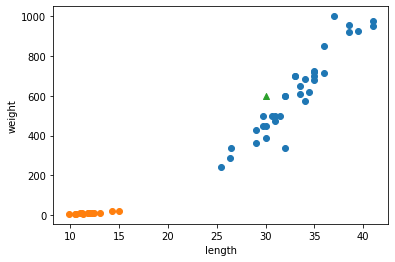

In [18]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [15]:
kn.predict([[30,600]])		# predict() - 새로운 데이터의 정답을 예측. 리스트의 리스트를 전달받아야 하므로 리스트로 2번 감싸주기
# array([1]) : 도미라고 판단.

array([1])

In [19]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [20]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [23]:
kn49 = KNeighborsClassifier(n_neighbors=49) #참고 데이터를 49개로 한 kn49모델

In [26]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [27]:
print(35/49)

0.7142857142857143
